Based on tutorial on huggingface:
https://huggingface.co/docs/diffusers/conceptual/evaluation

Dependency check and load huggingface scripts

In [1]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git

Cloning into 'diffusers'...
remote: Enumerating objects: 48355, done.
remote: Counting objects: 100% (12695/12695), done.
remote: Compressing objects: 100% (892/892), done.
remote: Total 48355 (delta 12243), reused 11908 (delta 11753), pack-reused 35660
Receiving objects: 100% (48355/48355), 31.43 MiB | 32.61 MiB/s, done.
Resolving deltas: 100% (36032/36032), done.


In [2]:
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt
!pip install -q datasets diffusers transformers accelerate torchmetrics[image]
!pip install torchaudio==2.2.0.dev20231211+cu121 --extra-index-url https://download.pytorch.org/whl/nightly/cu121/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

Model setup

In [11]:
# Stable Diffusion V1
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

model_path = 'arpachat/small-stable-diffusion-v0-th-1200-e5-g16-bs16'
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)


sd_pipeline.to("cuda")


/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


model_index.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "arpachat/small-stable-diffusion-v0-th-1200-e5-g16-bs16",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Useful functions for image preprocess and visulization

In [12]:
import numpy as np
from torchvision.transforms import functional as F

def preprocess_image(image):
    image = np.array(image).astype(np.float32)
    image = torch.tensor(image).unsqueeze(0)
    image = image.permute(0, 3, 1, 2) / 255.0
    return F.center_crop(image, (512, 512))

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))

    return grid.resize((200*cols, 200*rows))

Fixing sample prompts and random generator

In [13]:
generator = torch.manual_seed(42)
prompts = [
    "Quarter-Zip V-Neck Black Sweatshirt with Tommy Logo at the chest",
    "Solid Crewneck Navy Blue Crewneck polo with signature stripe tipping",
    "Embroidered Tommy Logo Green T-Shirt with textured boxy knit",
    "Slim Fit Stripe Classic White Polo with Tommy Flag Logo"
]

## CLIP Score

CLIP score measures the compatibility of image-caption pairs. Higher CLIP scores imply higher compatibility. The CLIP score is a quantitative measurement of the qualitative concept “compatibility”. Image-caption pair compatibility can also be thought of as the semantic similarity between the image and the caption. CLIP score was found to have high correlation with human judgement.

In [14]:
from datasets import load_dataset

images = sd_pipeline(prompts, num_images_per_prompt=1, generator=generator).images
images_np = np.concatenate([preprocess_image(image) for image in images])

  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
from torchmetrics.functional.multimodal import clip_score
from functools import partial

clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")


def calculate_clip_score(images_np, prompts):
    images_int = (images_np * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int), prompts).detach()
    return round(float(clip_score), 4)


sd_clip_score = calculate_clip_score(images_np, prompts)

In [16]:
print(f"CLIP Score: {sd_clip_score}")

CLIP Score: 33.1423


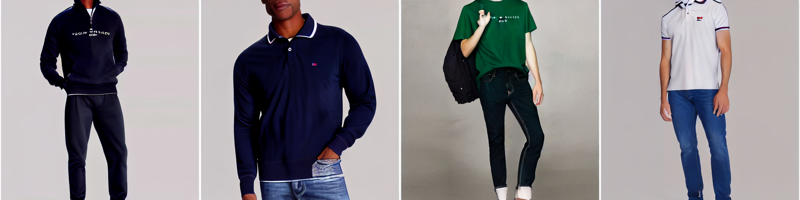

In [17]:
grid = image_grid(images, 1, 4)
grid

## Inception Score

In [18]:
prompts = [
    "Quarter-Zip V-Neck Black Sweatshirt with Tommy Logo at the chest",
]

generator = torch.manual_seed(42)
images = sd_pipeline(prompts, num_images_per_prompt=20, generator=generator).images
images_np = np.concatenate([preprocess_image(image) for image in images])

  0%|          | 0/50 [00:00<?, ?it/s]

In [19]:
from torchmetrics.image.inception import InceptionScore

def calculate_inception_score(images):
    images_int = (images * 255).astype("uint8")
    images_int = torch.from_numpy(images_int).detach()
    metric = InceptionScore()
    metric.update(images_int)
    return metric


sd_inception_score = calculate_inception_score(images_np)

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028
Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:01<00:00, 73.7MB/s]


In [20]:
print(f"Inception Score: {float(sd_inception_score.compute()[0].item())}")

Inception Score: 1.2720460891723633


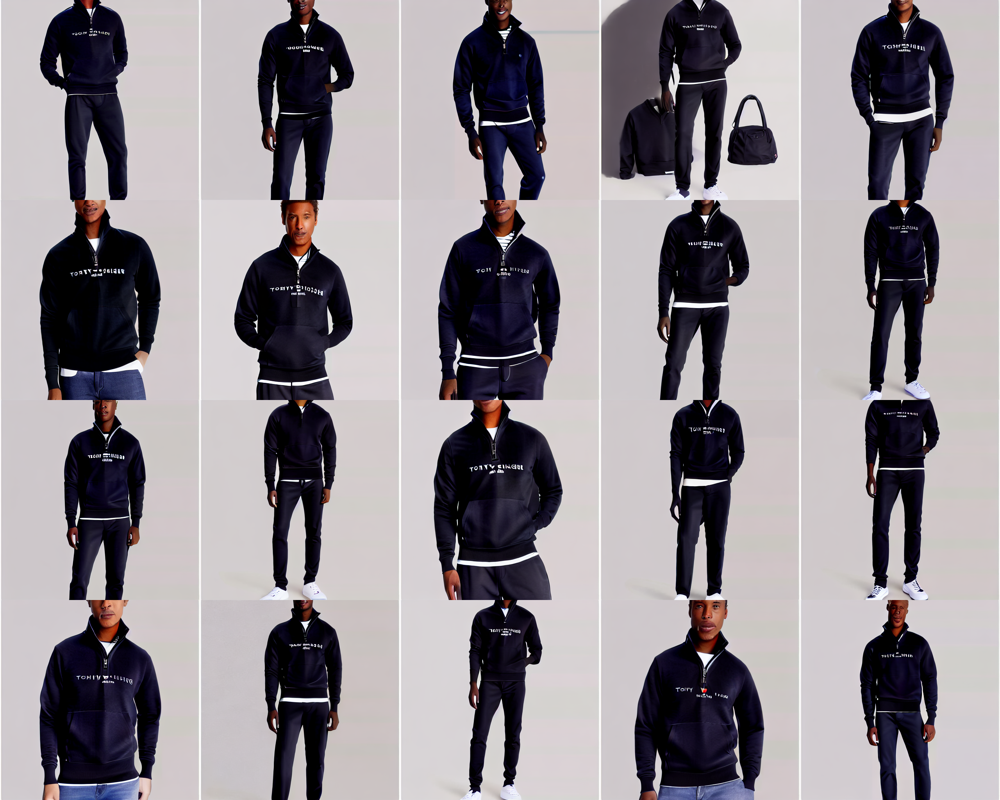

In [21]:
grid = image_grid(images, 4, 5)
grid

## Fréchet Inception Distance

Fréchet Inception Distance is a measure of similarity between two datasets of images. It was shown to correlate well with the human judgment of visual quality and is most often used to evaluate the quality of samples of Generative Adversarial Networks. FID is calculated by computing the Fréchet distance between two Gaussians fitted to feature representations of the Inception network.

In [15]:
from datasets import load_dataset

dataset = load_dataset("jwl25b/final_project_dataset", split="train")

real_images = [image.convert("RGB").resize((512,512)) for image in dataset['image']]
real_text = dataset['text']

real_images = real_images[0::2]
real_text = real_text[0::2]

In [16]:
real_images = torch.cat([preprocess_image(image) for image in real_images])
print(real_images.shape)

torch.Size([25, 3, 512, 512])


In [17]:
output = sd_pipeline(prompt=real_text, num_images_per_prompt=1, generator=generator)

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [18]:
output_images = torch.cat([preprocess_image(image) for image in output.images])
print(output_images.shape)

torch.Size([25, 3, 512, 512])


In [19]:
from torchmetrics.image.fid import FrechetInceptionDistance

fid = FrechetInceptionDistance(normalize=True)
fid.update(real_images, real=True)
fid.update(output_images, real=False)

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 307MB/s]


In [20]:
print(f"FID: {float(fid.compute())}")

FID: 149.6049346923828


## Visual Inspection

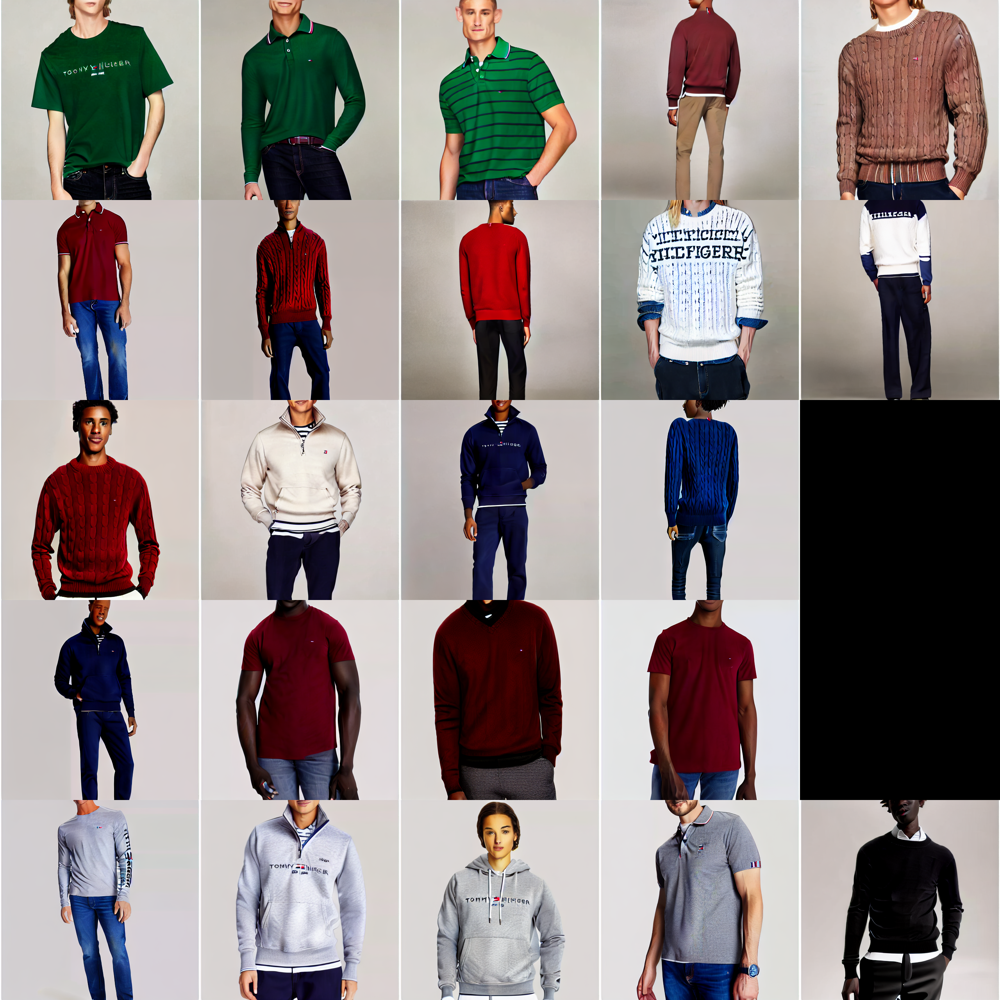

In [21]:
grid = image_grid(output.images[:], rows=5, cols=5)
grid